In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/us-counties.csv')
# Для работы с временными рядами конвертиую колонку даты в формат datetime
df['date'] = pd.to_datetime(df['date'])

In [3]:
df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

## sum, avg, min и max значения cases и deaths с группировкой до:

### группировка месяца

Для индексирования по дате я использовал метод `dt.strftime('%Y-%m')`, а чтобы сгруппировать данные по году и месяцу обычный groupBy. Затем я использовал метод agg для агрегации данных в каждой группе. Туда передал словарь, где ключами являются имена колонок, которые надо агрегировать, а значениями - список функций, которые применимы для каждой колонки. 

In [4]:
monthly_df = df.groupby(
    df['date'].dt.strftime('%Y-%m')
                        ).agg({
                                'cases': ['sum', 'mean', 'min', 'max'], 
                                'deaths': ['sum', 'mean', 'min', 'max']
                                 })

monthly_df

cases                                 deaths                   \
                sum          mean min      max         sum        mean  min   
date                                                                          
2020-01          41      1.051282   1        2         0.0    0.000000  0.0   
2020-02         736      2.050139   1       13         1.0    0.002786  0.0   
2020-03     1095533     46.654161   0    43518     20269.0    0.863172  0.0   
2020-04    19611708    245.176997   0   172784    990492.0   12.382698  0.0   
2020-05    45452114    488.837535   0   208085   2695246.0   29.647083  0.0   
2020-06    65288844    699.181229   0   219844   3498937.0   38.433386  0.0   
2020-07   111626136   1128.368757   0   229834   4307836.0   44.636625  0.0   
2020-08   166758528   1667.835455   0   241768   5259820.0   53.909826  0.0   
2020-09   199758786   2057.120940   0   270299   5879775.0   62.045196  0.0   
2020-10   252794114   2514.188529   0   307618   6774225.0   69.033874  0.0   
2020-11   338932078   3481.940394   0   401034   7449571.0   78.416537  0.0   
2020-12   525970605   5228.180124   0   770915   9537613.0   97.139207  0.0   
2021-01   729984096   7255.798265   0  1117346  12216246.0  124.415627  0.0   
2021-02   773617710   8512.518816   0  1192559  13511297.0  152.332653  0.0   
2021-03   916857453   9109.725702   0  1220217  16598944.0  168.983834  0.0   
2021-04   944997168   9699.640425   0  1233723  16938795.0  178.141840  0.0   
2021-05  1020501942  10139.921126   0  1244722  18153720.0  184.819596  0.0   
2021-06  1003878600  10310.466800   0  1250908  18001792.0  189.442694  0.0   
2021-07  1059339596  10524.147072   0  1301009  18857887.0  191.957319  0.0   
2021-08  1148978762  11409.804888   0  1408026  19355736.0  196.938799  0.0   
2021-09  1247666211  12801.565851   0  1459891  20063233.0  210.921059  0.0   
2021-10  1390097002  13800.913398   0  1493874  22446279.0  228.328390  0.0   
2021-11  1417533896  14538.361856   0  1527836  22952318.0  241.189517  0.0   
2021-12  1575677425  15638.236418   0  1697286  24890789.0  253.109508  0.0   
2022-01  2037666117  20208.726652   0  2660118  26440378.0  268.667534  0.0   
2022-02  2173725838  23873.192954   0  2797264  25818487.0  290.522983  0.0   
2022-03  2465286532  24448.960985   0  2833910  29979138.0  304.616505  0.0   
2022-04  2416628654  24745.580581   0  2872907  29590230.0  310.433702  0.0   
2022-05  1063202003  25108.088393   0  2908425  12944137.0  313.182284  0.0   

                  
             max  
date              
2020-01      0.0  
2020-02      1.0  
2020-03   1475.0  
2020-04  17809.0  
2020-05  21050.0  
2020-06  22566.0  
2020-07  23002.0  
2020-08  23695.0  
2020-09  23823.0  
2020-10  24001.0  
2020-11  24274.0  
2020-12  25144.0  
2021-01  27138.0  
2021-02  29332.0  
2021-03  31209.0  
2021-04  32545.0  
2021-05  33222.0  
2021-06  33415.0  
2021-07  33534.0  
2021-08  33830.0  
2021-09  34264.0  
2021-10  34557.0  
2021-11  34828.0  
2021-12  35382.0  
2022-01  38320.0  
2022-02  39784.0  
2022-03  40079.0  
2022-04  40199.0  
2022-05  40267.0

### группировка по месяцу и штату

In [5]:
# Группировка по месяцу и штату
monthly_state_df = df.groupby(
    [df['date'].dt.strftime('%Y-%m'), 'state']
                              ).agg({
                                    'cases': ['sum', 'mean', 'min', 'max'],
                                    'deaths': ['sum', 'mean', 'min', 'max']
                                     } )

monthly_state_df

cases                                deaths  \
                            sum          mean   min     max       sum   
date    state                                                           
2020-01 Arizona               6      1.000000     1       1       0.0   
        California           14      1.000000     1       1       0.0   
        Illinois             10      1.250000     1       2       0.0   
        Washington           11      1.000000     1       1       0.0   
2020-02 Arizona              29      1.000000     1       1       0.0   
...                         ...           ...   ...     ...       ...   
2022-05 Virginia       22319016  12908.626952   375  188156  263597.0   
        Washington     19722810  38148.568665   388  410322  166155.0   
        West Virginia   6541152   9148.464336  1451   47739   89410.0   
        Wisconsin      21115535  22559.332265  1086  277430  187988.0   
        Wyoming         2038439   6817.521739   658   26292   23590.0   

                                                 
                             mean   min     max  
date    state                                    
2020-01 Arizona          0.000000   0.0     0.0  
        California       0.000000   0.0     0.0  
        Illinois         0.000000   0.0     0.0  
        Washington       0.000000   0.0     0.0  
2020-02 Arizona          0.000000   0.0     0.0  
...                           ...   ...     ...  
2022-05 Virginia       152.456333   7.0  1453.0  
        Washington     321.382979   0.0  2774.0  
        West Virginia  125.048951  14.0   724.0  
        Wisconsin      200.841880  12.0  2292.0  
        Wyoming         78.896321  10.0   290.0  

[1508 rows x 8 columns]

### группировка по месяцу и округу

In [6]:
# Хочу сократить названия округов до 3 знаков
df['short_county'] = df['county'].apply(lambda x: x[:3])

monthly_county_df = df.groupby(
            [df['date'].dt.strftime('%Y-%m'), 'short_county']
                                      ).agg({
                                        'cases': ['sum', 'mean', 'min', 'max'],
                                        'deaths': ['sum', 'mean', 'min', 'max']
                                         } )

monthly_county_df

cases                              deaths              \
                         sum          mean   min    max      sum        mean   
date    short_county                                                           
2020-01 Coo               10      1.250000     1      2      0.0    0.000000   
        Los                6      1.000000     1      1      0.0    0.000000   
        Mar                6      1.000000     1      1      0.0    0.000000   
        Ora                7      1.000000     1      1      0.0    0.000000   
        San                1      1.000000     1      1      0.0    0.000000   
...                      ...           ...   ...    ...      ...         ...   
2022-05 Yuk            18628   1432.923077  1423   1438    130.0   10.000000   
        Yum           839806  32300.230769  1882  62751  15618.0  600.692308   
        Zap            48566   3735.846154  3712   3752    715.0   55.000000   
        Zav            52717   4055.153846  4052   4059    884.0   68.000000   
        Zie             8632    664.000000   664    664    143.0   11.000000   

                                    
                       min     max  
date    short_county                
2020-01 Coo            0.0     0.0  
        Los            0.0     0.0  
        Mar            0.0     0.0  
        Ora            0.0     0.0  
        San            0.0     0.0  
...                    ...     ...  
2022-05 Yuk           10.0    10.0  
        Yum           23.0  1181.0  
        Zap           55.0    55.0  
        Zav           68.0    68.0  
        Zie           11.0    11.0  

[23655 rows x 8 columns]

## Для каждой строки значение которое было неделю назад и месяц назад


In [7]:
df_flashback = df
# присвою через loc значения из сдвинутых столбцов (: - в конец всех столбцов)
#fips - индекс округа, обеспечивает уникальность
df_flashback.loc[:, 'cases one week ago'] = df_flashback.groupby(['fips'])['cases'].shift(7)
df_flashback.loc[:, 'cases one month ago'] = df_flashback.groupby(['fips'])['cases'].shift(30)
df_flashback.loc[:, 'deaths one week ago'] = df_flashback.groupby(['fips'])['deaths'].shift(7)
df_flashback.loc[:, 'deaths one month ago'] = df_flashback.groupby(['fips'])['deaths'].shift(30)

In [8]:
# Snohomish fips
df_flashback = df_flashback.loc[df['fips'] == 53061.0]
df_flashback.tail(14)

date     county       state     fips   cases  deaths  \
2460328 2022-04-30  Snohomish  Washington  53061.0  155026  1139.0   
2463584 2022-05-01  Snohomish  Washington  53061.0  155026  1139.0   
2466839 2022-05-02  Snohomish  Washington  53061.0  156715  1139.0   
2470095 2022-05-03  Snohomish  Washington  53061.0  156715  1139.0   
2473351 2022-05-04  Snohomish  Washington  53061.0  156303  1140.0   
2476609 2022-05-05  Snohomish  Washington  53061.0  156303  1140.0   
2479867 2022-05-06  Snohomish  Washington  53061.0  156303  1140.0   
2483125 2022-05-07  Snohomish  Washington  53061.0  156303  1140.0   
2486383 2022-05-08  Snohomish  Washington  53061.0  156303  1140.0   
2489640 2022-05-09  Snohomish  Washington  53061.0  157745  1144.0   
2492898 2022-05-10  Snohomish  Washington  53061.0  157745  1144.0   
2496156 2022-05-11  Snohomish  Washington  53061.0  158407  1145.0   
2499414 2022-05-12  Snohomish  Washington  53061.0  158407  1145.0   
2502672 2022-05-13  Snohomish  Washington  53061.0  159246  1145.0   

        short_county  cases one week ago  cases one month ago  \
2460328          Sno            153141.0             149281.0   
2463584          Sno            153141.0             149435.0   
2466839          Sno            153901.0             149435.0   
2470095          Sno            153901.0             149435.0   
2473351          Sno            154395.0             149697.0   
2476609          Sno            154395.0             149697.0   
2479867          Sno            155026.0             151044.0   
2483125          Sno            155026.0             151044.0   
2486383          Sno            155026.0             151258.0   
2489640          Sno            156715.0             151258.0   
2492898          Sno            156715.0             151258.0   
2496156          Sno            156303.0             151258.0   
2499414          Sno            156303.0             151258.0   
2502672          Sno            156303.0             151786.0   

         deaths one week ago  deaths one month ago  
2460328               1134.0                1112.0  
2463584               1134.0                1119.0  
2466839               1136.0                1119.0  
2470095               1136.0                1119.0  
2473351               1138.0                1119.0  
2476609               1138.0                1119.0  
2479867               1139.0                1120.0  
2483125               1139.0                1120.0  
2486383               1139.0                1122.0  
2489640               1139.0                1122.0  
2492898               1139.0                1122.0  
2496156               1140.0                1122.0  
2499414               1140.0                1122.0  
2502672               1140.0                1126.0

## Сумму текущего и предыдущего дня:
### для date, country, state, группировка до date, state


In [9]:
df_sum = df
df_sum['date_sum_cases'] = df_sum.groupby(['date'])['cases'].shift(1) + df['cases']
df_sum['date_sum_deaths'] = df_sum.groupby(['date'])['deaths'].shift(1) + df['deaths']
df_sum['county_sum_cases'] = df_sum.groupby(['county'])['cases'].shift(1) + df['cases']
df_sum['county_sum_deaths'] = df_sum.groupby(['county'])['deaths'].shift(1) + df['deaths']
df_sum['state_sum_cases'] = df_sum.groupby(['state'])['cases'].shift(1) + df['cases']
df_sum['state_sum_deaths'] = df_sum.groupby(['state'])['deaths'].shift(1) + df['deaths']

In [10]:
# show some results for Washngton state
df_sum = df_sum.loc[df['state'] == 'Washington']
df_sum.tail(14)

date       county       state     fips   cases  deaths  \
2502668 2022-05-13       Pierce  Washington  53053.0  198375  1409.0   
2502669 2022-05-13     San Juan  Washington  53055.0    1450     2.0   
2502670 2022-05-13       Skagit  Washington  53057.0   22747   204.0   
2502671 2022-05-13     Skamania  Washington  53059.0    1531    12.0   
2502672 2022-05-13    Snohomish  Washington  53061.0  159246  1145.0   
2502673 2022-05-13      Spokane  Washington  53063.0  126131  1378.0   
2502674 2022-05-13      Stevens  Washington  53065.0    8277   147.0   
2502675 2022-05-13     Thurston  Washington  53067.0   49071   417.0   
2502676 2022-05-13      Unknown  Washington      NaN    3265     0.0   
2502677 2022-05-13    Wahkiakum  Washington  53069.0     537     7.0   
2502678 2022-05-13  Walla Walla  Washington  53071.0   16305   142.0   
2502679 2022-05-13      Whatcom  Washington  53073.0   39343   301.0   
2502680 2022-05-13      Whitman  Washington  53075.0    8806    90.0   
2502681 2022-05-13       Yakima  Washington  53077.0   73887   790.0   

        short_county  cases one week ago  cases one month ago  \
2502668          Pie            196034.0             192922.0   
2502669          San              1307.0               1211.0   
2502670          Ska             22491.0              22106.0   
2502671          Ska              1515.0               1503.0   
2502672          Sno            156303.0             151786.0   
2502673          Spo            125416.0             124132.0   
2502674          Ste              8213.0               8118.0   
2502675          Thu             48231.0              46954.0   
2502676          Unk                 NaN                  NaN   
2502677          Wah               537.0                530.0   
2502678          Wal             16213.0              15939.0   
2502679          Wha             38720.0              37577.0   
2502680          Whi              8756.0               8695.0   
2502681          Yak             73738.0              73382.0   

         deaths one week ago  deaths one month ago  date_sum_cases  \
2502668               1401.0                1385.0        200883.0   
2502669                  2.0                   2.0        199825.0   
2502670                204.0                 203.0         24197.0   
2502671                 13.0                  13.0         24278.0   
2502672               1140.0                1126.0        160777.0   
2502673               1371.0                1363.0        285377.0   
2502674                146.0                 144.0        134408.0   
2502675                412.0                 414.0         57348.0   
2502676                  NaN                   NaN         52336.0   
2502677                  7.0                   6.0          3802.0   
2502678                141.0                 140.0         16842.0   
2502679                298.0                 293.0         55648.0   
2502680                 90.0                  90.0         48149.0   
2502681                789.0                 777.0         82693.0   

         date_sum_deaths  county_sum_cases  county_sum_deaths  \
2502668           1445.0          199440.0             1441.0   
2502669           1411.0            5454.0               51.0   
2502670            206.0           45440.0              408.0   
2502671            216.0            3060.0               25.0   
2502672           1157.0          317653.0             2290.0   
2502673           2523.0          252084.0             2752.0   
2502674           1525.0           10952.0              160.0   
2502675            564.0           50807.0              440.0   
2502676            417.0            4761.0                2.0   
2502677              7.0            1074.0               14.0   
2502678            149.0           32595.0              283.0   
2502679            443.0           78531.0              601.0   
2502680            391.0           17595.0              180.0

In [11]:
df_group_sum = df

df_group_sum['state_sum_cases'] = df_sum.groupby(['state', 'date'])['cases'].shift(1) + df['cases']
df_group_sum['state_sum_deaths'] = df_sum.groupby(['state', 'date'])['deaths'].shift(1) + df['deaths']

In [12]:
# show some results for Washngton state
df_group_sum = df_group_sum.loc[df['state'] == 'Washington']
df_group_sum.tail(5)

date       county       state     fips  cases  deaths  \
2502677 2022-05-13    Wahkiakum  Washington  53069.0    537     7.0   
2502678 2022-05-13  Walla Walla  Washington  53071.0  16305   142.0   
2502679 2022-05-13      Whatcom  Washington  53073.0  39343   301.0   
2502680 2022-05-13      Whitman  Washington  53075.0   8806    90.0   
2502681 2022-05-13       Yakima  Washington  53077.0  73887   790.0   

        short_county  cases one week ago  cases one month ago  \
2502677          Wah               537.0                530.0   
2502678          Wal             16213.0              15939.0   
2502679          Wha             38720.0              37577.0   
2502680          Whi              8756.0               8695.0   
2502681          Yak             73738.0              73382.0   

         deaths one week ago  deaths one month ago  date_sum_cases  \
2502677                  7.0                   6.0          3802.0   
2502678                141.0                 140.0         16842.0   
2502679                298.0                 293.0         55648.0   
2502680                 90.0                  90.0         48149.0   
2502681                789.0                 777.0         82693.0   

         date_sum_deaths  county_sum_cases  county_sum_deaths  \
2502677              7.0            1074.0               14.0   
2502678            149.0           32595.0              283.0   
2502679            443.0           78531.0              601.0   
2502680            391.0           17595.0              180.0   
2502681            880.0          147625.0             1580.0   

         state_sum_cases  state_sum_deaths  
2502677           3802.0               7.0  
2502678          16842.0             149.0  
2502679          55648.0             443.0  
2502680          48149.0             391.0  
2502681          82693.0             880.0

## Фильтрации
### Оставить строки только за рабочие дни и выходные дни

In [13]:
# коль уж индекс с 0, то сб и вск 5 и 6 день соотв-но
# булевский датафрейм 
work_day_mask = (df['date'].dt.weekday == 0)|(df['date'].dt.weekday == 1)|(df['date'].dt.weekday == 2)|(df['date'].dt.weekday == 3)|(df['date'].dt.weekday == 4)

work_day_df = df[work_day_mask]

work_day_df.head(20)

date       county       state     fips  cases  deaths short_county  \
0  2020-01-21    Snohomish  Washington  53061.0      1     0.0          Sno   
1  2020-01-22    Snohomish  Washington  53061.0      1     0.0          Sno   
2  2020-01-23    Snohomish  Washington  53061.0      1     0.0          Sno   
3  2020-01-24         Cook    Illinois  17031.0      1     0.0          Coo   
4  2020-01-24    Snohomish  Washington  53061.0      1     0.0          Sno   
13 2020-01-27     Maricopa     Arizona   4013.0      1     0.0          Mar   
14 2020-01-27  Los Angeles  California   6037.0      1     0.0          Los   
15 2020-01-27       Orange  California   6059.0      1     0.0          Ora   
16 2020-01-27         Cook    Illinois  17031.0      1     0.0          Coo   
17 2020-01-27    Snohomish  Washington  53061.0      1     0.0          Sno   
18 2020-01-28     Maricopa     Arizona   4013.0      1     0.0          Mar   
19 2020-01-28  Los Angeles  California   6037.0      1     0.0          Los   
20 2020-01-28       Orange  California   6059.0      1     0.0          Ora   
21 2020-01-28         Cook    Illinois  17031.0      1     0.0          Coo   
22 2020-01-28    Snohomish  Washington  53061.0      1     0.0          Sno   
23 2020-01-29     Maricopa     Arizona   4013.0      1     0.0          Mar   
24 2020-01-29  Los Angeles  California   6037.0      1     0.0          Los   
25 2020-01-29       Orange  California   6059.0      1     0.0          Ora   
26 2020-01-29         Cook    Illinois  17031.0      1     0.0          Coo   
27 2020-01-29    Snohomish  Washington  53061.0      1     0.0          Sno   

    cases one week ago  cases one month ago  deaths one week ago  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   
13                 NaN                  NaN                  NaN   
14                 NaN                  NaN                  NaN   
15                 NaN                  NaN                  NaN   
16                 NaN                  NaN                  NaN   
17                 NaN                  NaN                  NaN   
18                 NaN                  NaN                  NaN   
19                 NaN                  NaN                  NaN   
20                 NaN                  NaN                  NaN   
21                 NaN                  NaN                  NaN   
22                 1.0                  NaN                  0.0   
23                 NaN                  NaN                  NaN   
24                 NaN                  NaN                  NaN   
25                 NaN                  NaN                  NaN   
26                 NaN                  NaN                  NaN   
27                 1.0                  NaN                  0.0   

    deaths one month ago  date_sum_cases  date_sum_deaths  county_sum_cases  \
0                    NaN             NaN              NaN               NaN   
1                    NaN             NaN              NaN               2.0   
2                    NaN             NaN              NaN               2.0   
3                    NaN             NaN              NaN               NaN   
4                    NaN             2.0              0.0               2.0   
13                   NaN             NaN              NaN               2.0   
14                   NaN             2.0              0.0               2.0   
15                   NaN             2.0              0.0               2.0   
16                   NaN             2.0              0.0               2.0   
17                   NaN             2.0              0.0               2.0   
18                   NaN             NaN           

In [14]:
# соберу все дни в список
all_days = pd.date_range(start=df['date'].min(), end=df['date'].max())

# оставлю будни
w_days = [day for day in all_days if day.weekday() in [i for i in range(5)]]

# воспользуюсь isin дабы оставить только целевые строки 
w_df = df[df['date'].isin(w_days)]

w_df.head(10)


date       county       state     fips  cases  deaths short_county  \
0  2020-01-21    Snohomish  Washington  53061.0      1     0.0          Sno   
1  2020-01-22    Snohomish  Washington  53061.0      1     0.0          Sno   
2  2020-01-23    Snohomish  Washington  53061.0      1     0.0          Sno   
3  2020-01-24         Cook    Illinois  17031.0      1     0.0          Coo   
4  2020-01-24    Snohomish  Washington  53061.0      1     0.0          Sno   
13 2020-01-27     Maricopa     Arizona   4013.0      1     0.0          Mar   
14 2020-01-27  Los Angeles  California   6037.0      1     0.0          Los   
15 2020-01-27       Orange  California   6059.0      1     0.0          Ora   
16 2020-01-27         Cook    Illinois  17031.0      1     0.0          Coo   
17 2020-01-27    Snohomish  Washington  53061.0      1     0.0          Sno   

    cases one week ago  cases one month ago  deaths one week ago  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   
13                 NaN                  NaN                  NaN   
14                 NaN                  NaN                  NaN   
15                 NaN                  NaN                  NaN   
16                 NaN                  NaN                  NaN   
17                 NaN                  NaN                  NaN   

    deaths one month ago  date_sum_cases  date_sum_deaths  county_sum_cases  \
0                    NaN             NaN              NaN               NaN   
1                    NaN             NaN              NaN               2.0   
2                    NaN             NaN              NaN               2.0   
3                    NaN             NaN              NaN               NaN   
4                    NaN             2.0              0.0               2.0   
13                   NaN             NaN              NaN               2.0   
14                   NaN             2.0              0.0               2.0   
15                   NaN             2.0              0.0               2.0   
16                   NaN             2.0              0.0               2.0   
17                   NaN             2.0              0.0               2.0   

    county_sum_deaths  state_sum_cases  state_sum_deaths  
0                 NaN              NaN               NaN  
1                 0.0              NaN               NaN  
2                 0.0              NaN               NaN  
3                 NaN              NaN               NaN  
4                 0.0              NaN               NaN  
13                0.0              NaN               NaN  
14                0.0              NaN               NaN  
15                0.0              NaN               NaN  
16                0.0              NaN               NaN  
17                0.0              NaN               NaN

In [15]:
all_days

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07',
               '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
               '2022-05-12', '2022-05-13'],
              dtype='datetime64[ns]', length=844, freq='D')

### top 10 state по cases в каждом месяце

In [16]:
# 12 блоков по 10 строк

# Выделю месяц отдельно для дальнейшей группировки
# Добавление столбцев 'month' и 'year'
df['month'] = df['date'].dt.month
# Группировка данных по месяцам и штатам, агрегирование по количеству случаев
state_cases = df.groupby(['month', 'state'])['cases'].sum().reset_index()
# Выбор топ-10 штатов для каждого месяца (сложность дикая)
top10_by_cases = state_cases.groupby('month').apply(lambda x: x.nlargest(10, 'cases'))

top10_by_cases

month           state      cases
month                                      
1     5        1      California  306715562
      47       1           Texas  234547089
      10       1         Florida  202076455
      34       1        New York  172917813
      15       1        Illinois  113440432
...          ...             ...        ...
12    651     12            Ohio   74660464
      654     12    Pennsylvania   74078307
      624     12         Georgia   68715121
      637     12        Michigan   64209061
      648     12  North Carolina   63285173

[120 rows x 3 columns]

### top 10 state по deaths в каждом месяце 

In [17]:
# Группировка данных по месяцам и штатам, агрегирование по количеству смэрти
state_deaths = df.groupby(['month', 'state'])['deaths'].sum().reset_index()
# Выбор топ-10 штатов для каждого месяца (сложность дикая)
top10_by_deaths = state_deaths.groupby('month').apply(lambda x: x.nlargest(10, 'deaths'))

top10_by_deaths

month         state     deaths
month                                    
1     5        1    California  3453664.0
      47       1         Texas  3415726.0
      34       1      New York  3159076.0
      10       1       Florida  2709785.0
      41       1  Pennsylvania  1785937.0
...          ...           ...        ...
12    645     12    New Jersey  1446336.0
      628     12      Illinois  1421957.0
      624     12       Georgia  1232163.0
      637     12      Michigan  1206797.0
      651     12          Ohio  1101917.0

[120 rows x 3 columns]

## Полезные графики

График временных рядов для каждого штата, показывающий изменение количества случаев и смертей от COVID-19 со временем с линией тренда
Использовал функцию polyfit(x, y, deg) из библиотеки numpy для построения линейной регрессии. Она принимает на вход 3 параметра:
> 1. массив значений независимой переменной - range(len(state_data))
> 2. массив значений зависимой переменной - state_data[‘deaths’] или [‘cases’]
> 3. степень полинома, который используется для аппроксимации данных (в случае линейной регрессии это должно быть 1)

Функция возвращает массив коэффициентов полинома, которые можно использовать для построения линии тренда. Затем уже функция poly1d() используется для создания объекта полинома на основе массива коэффициентов. 


In [18]:
import matplotlib.pyplot as plt

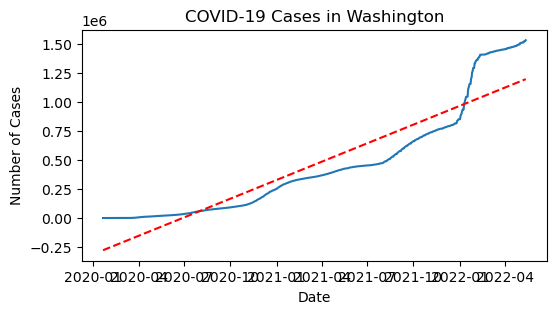

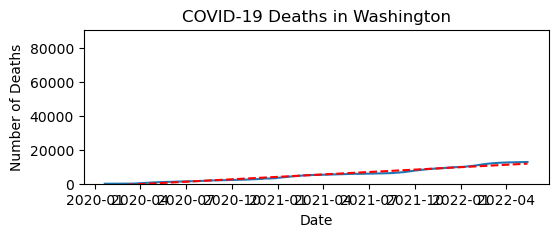

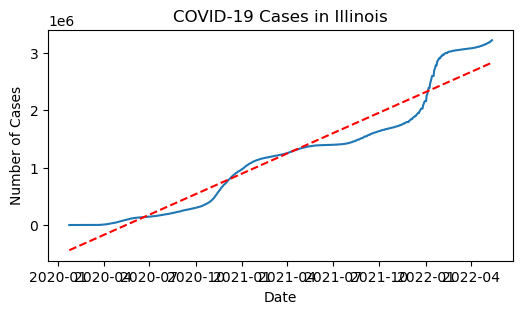

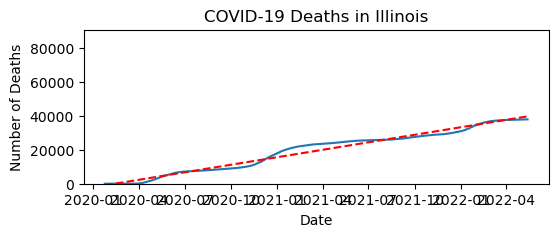

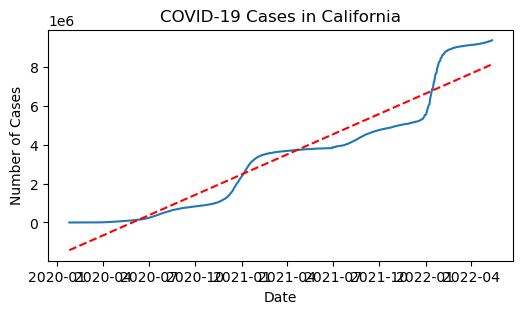

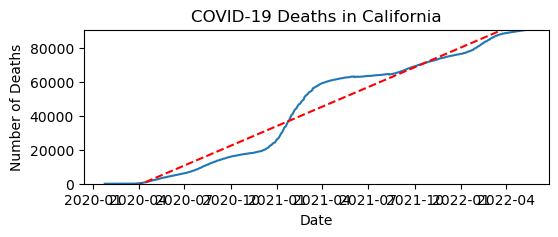

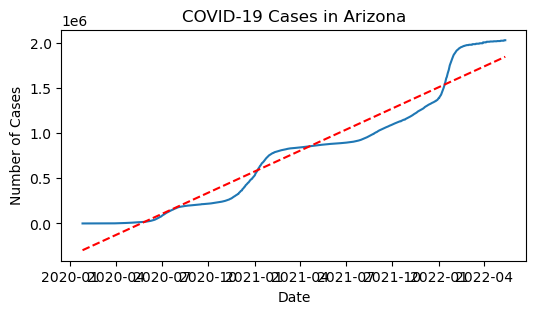

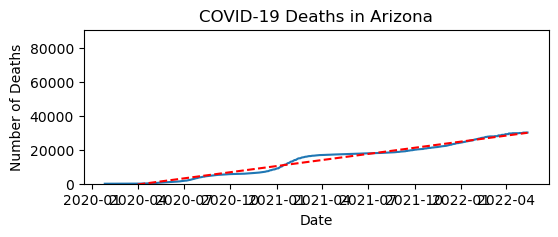

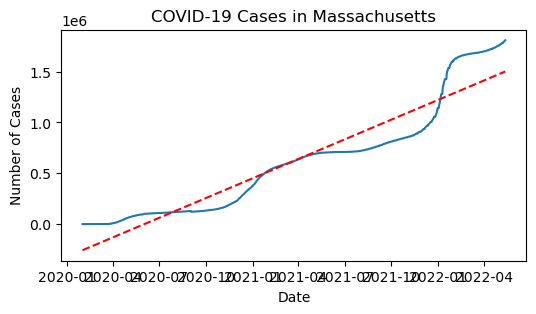

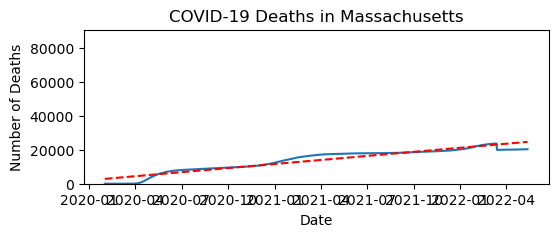

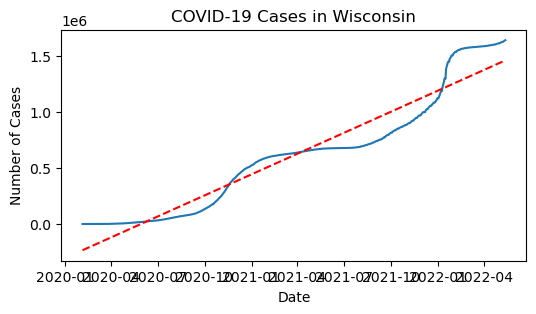

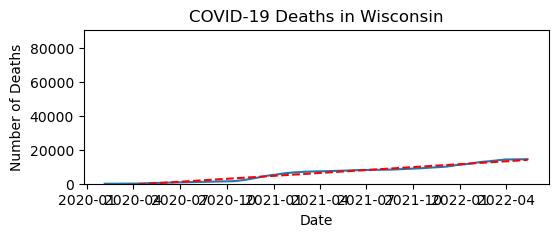

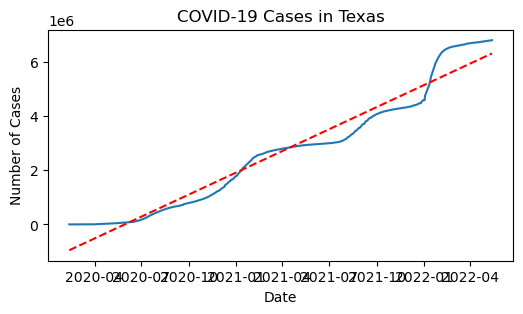

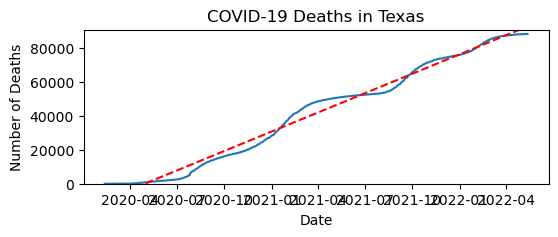

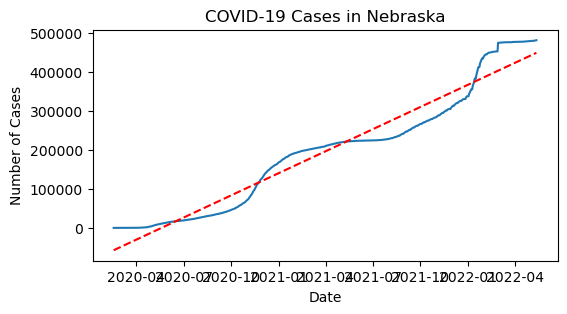

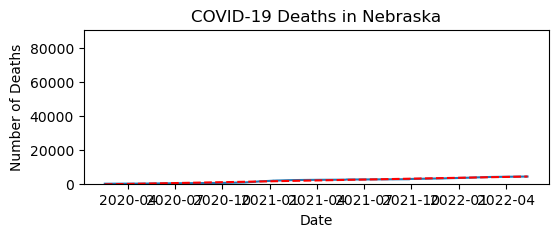

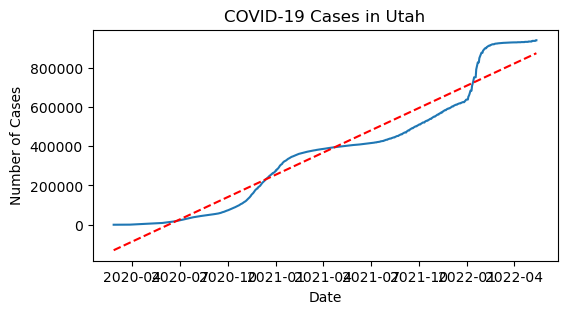

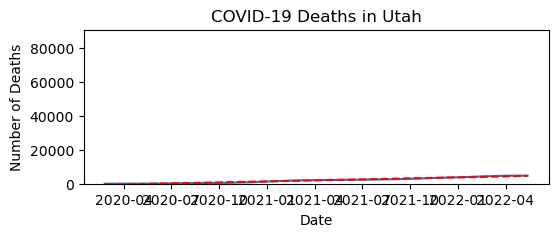

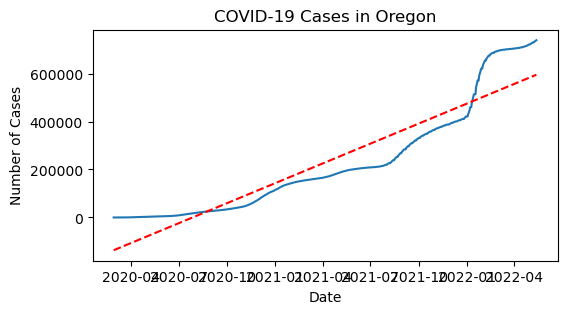

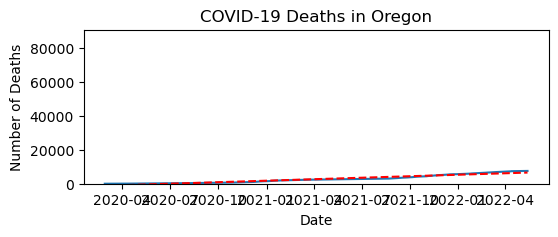

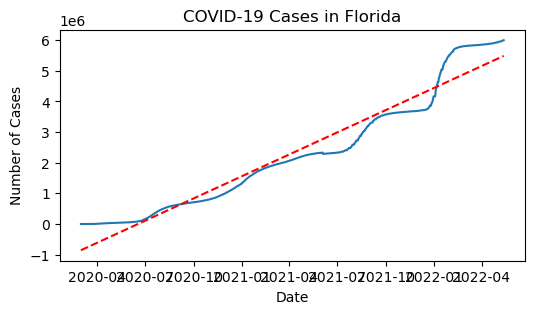

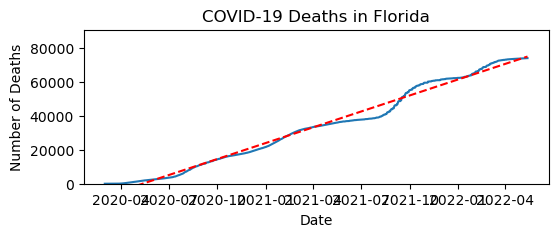

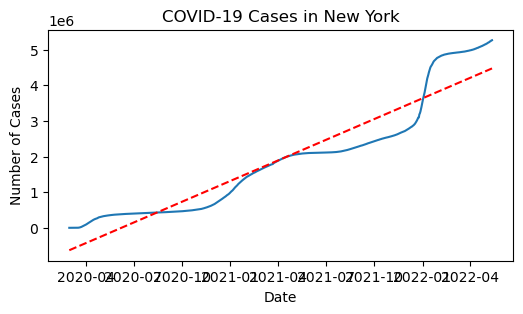

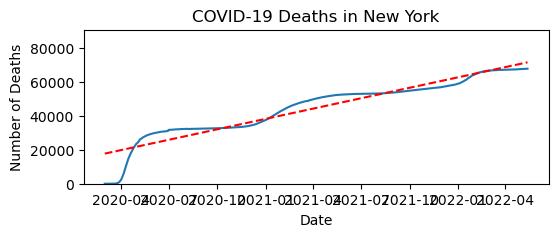

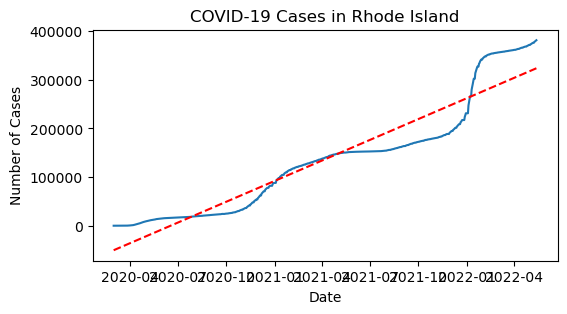

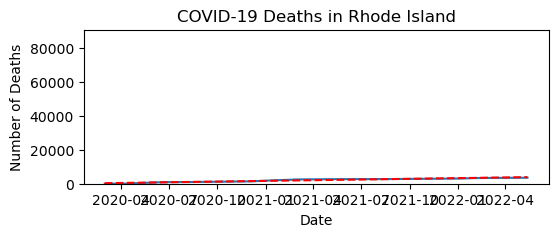

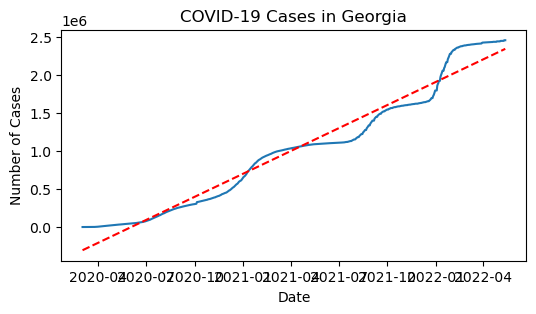

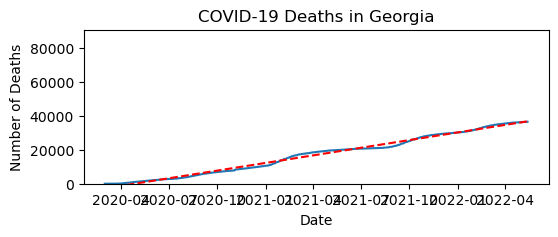

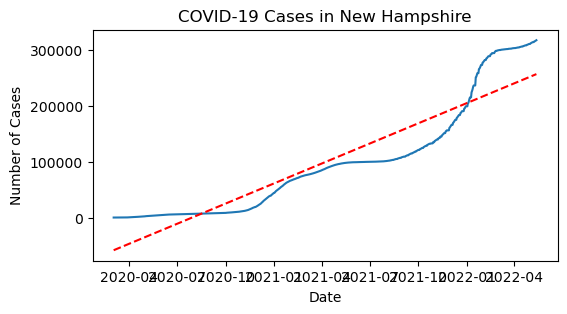

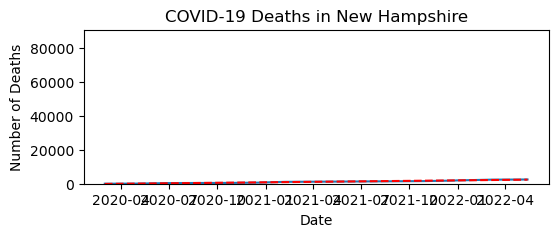

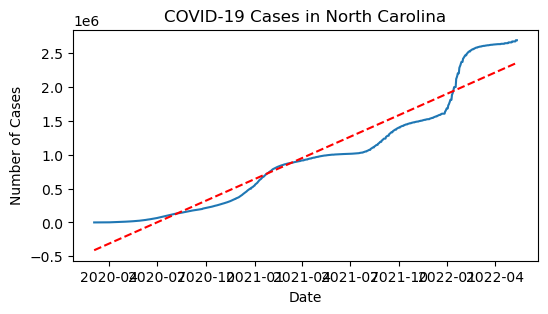

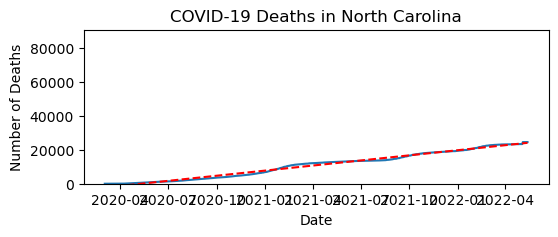

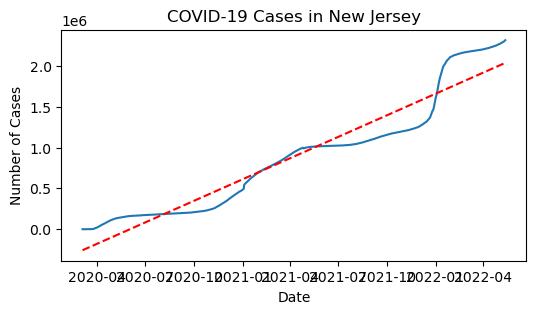

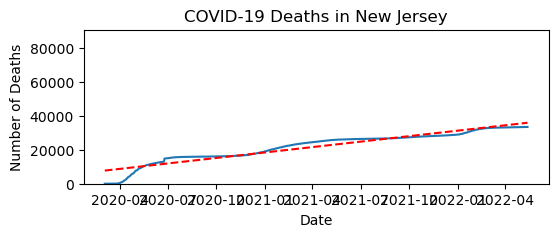

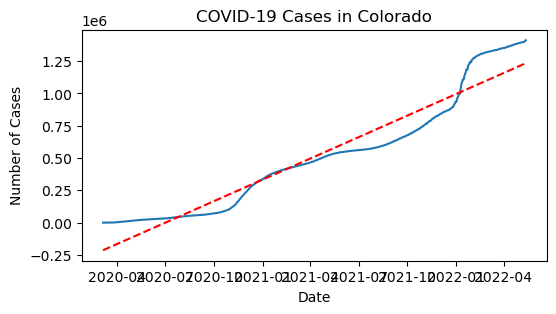

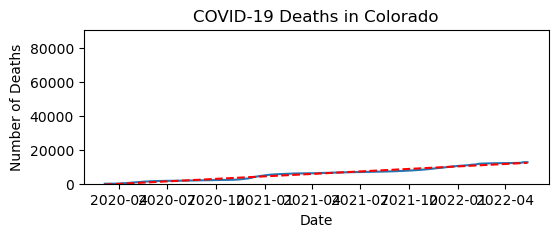

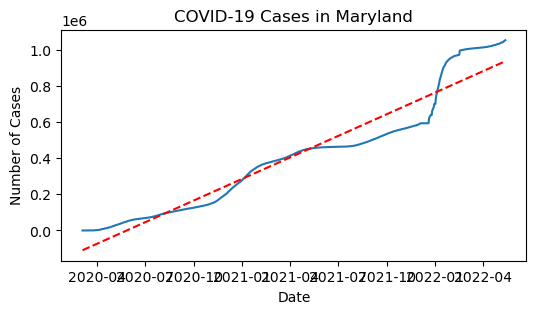

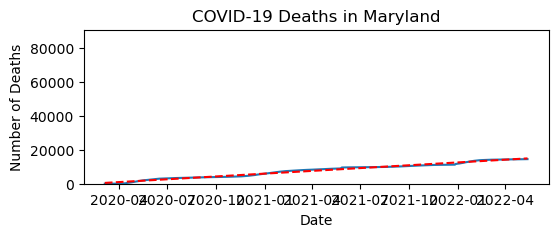

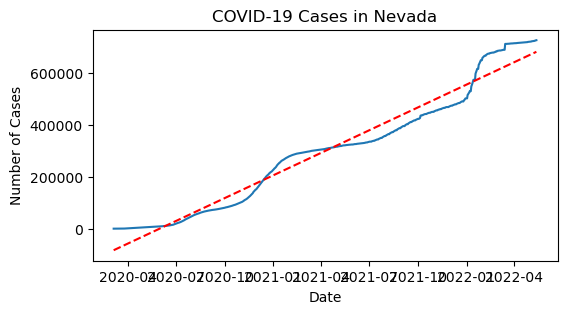

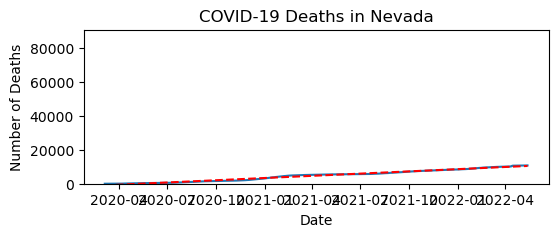

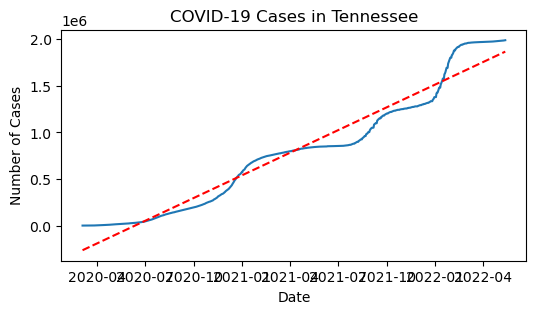

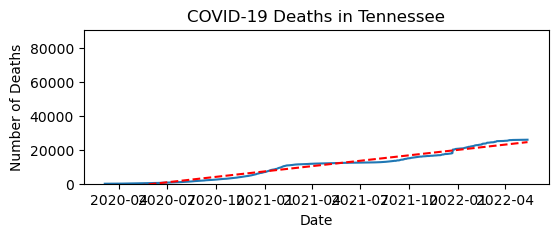

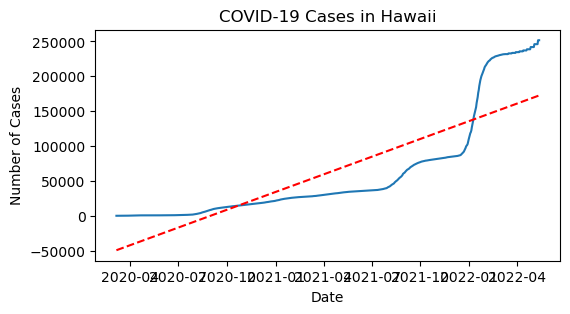

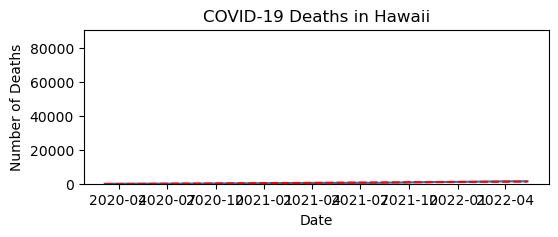

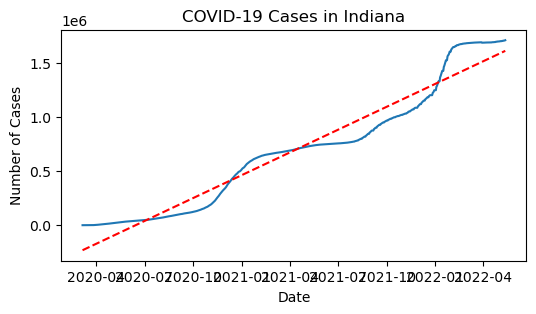

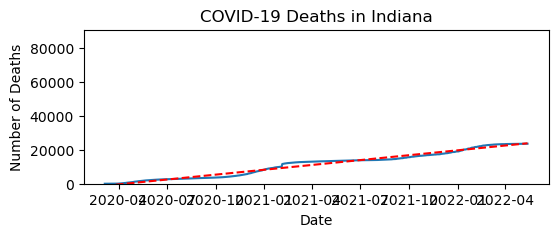

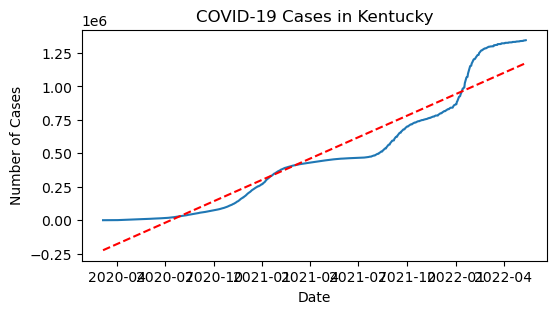

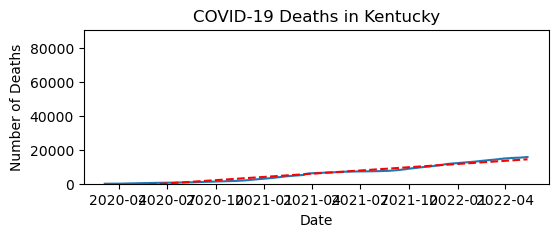

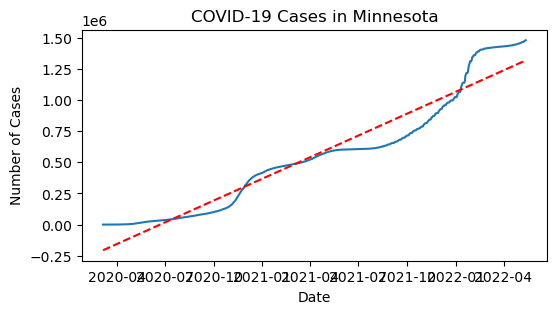

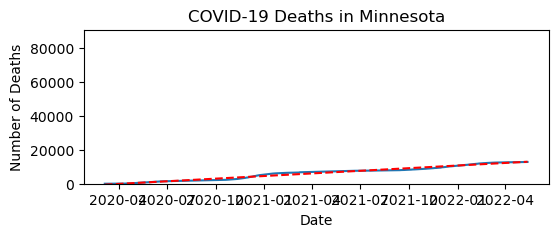

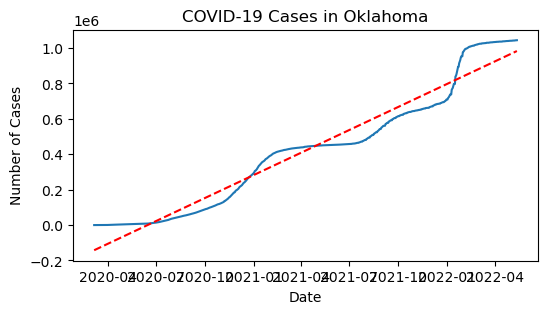

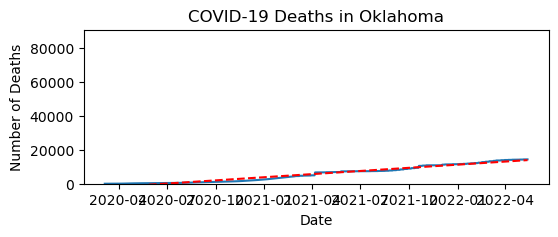

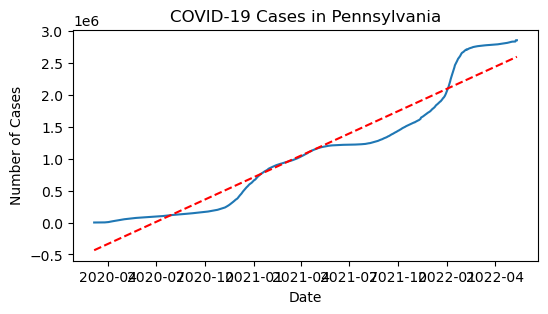

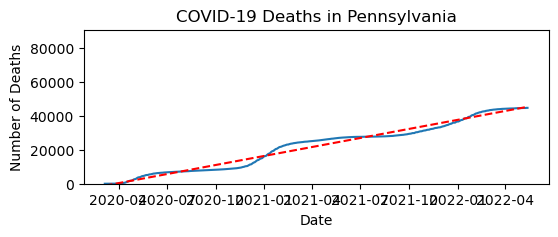

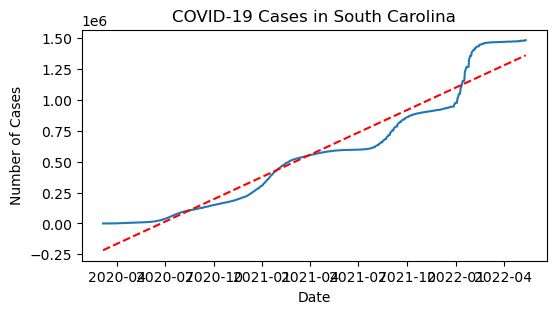

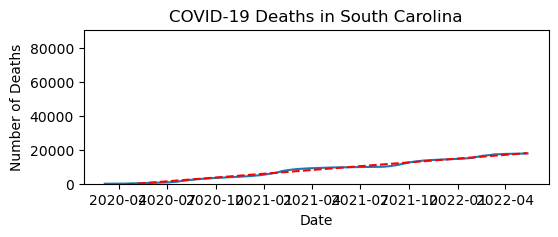

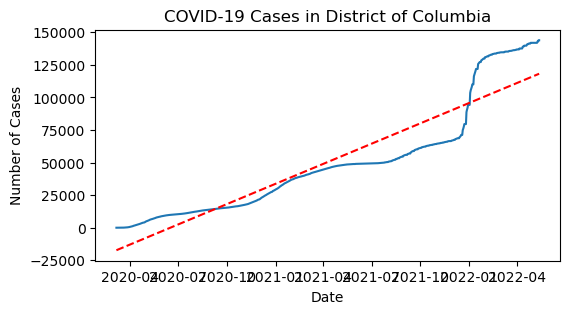

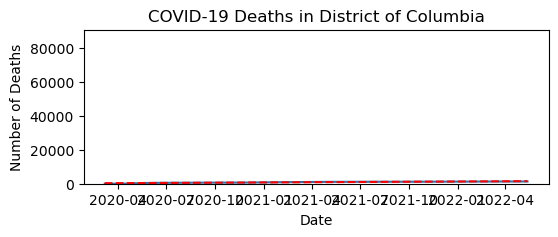

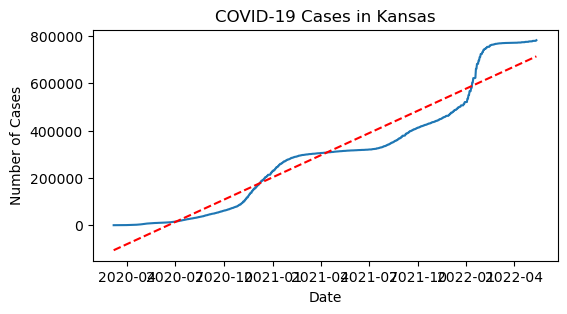

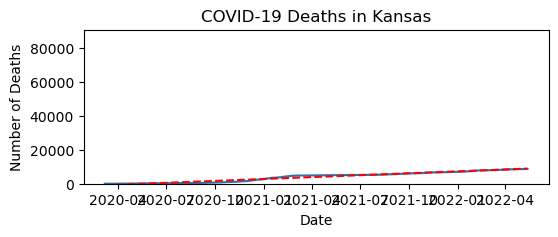

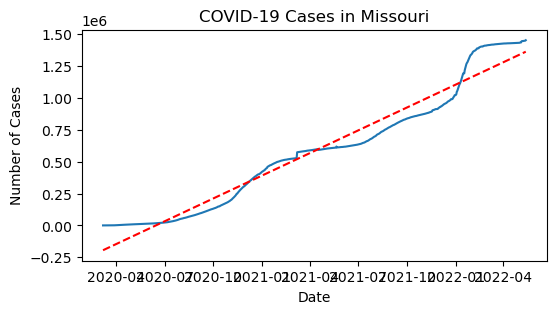

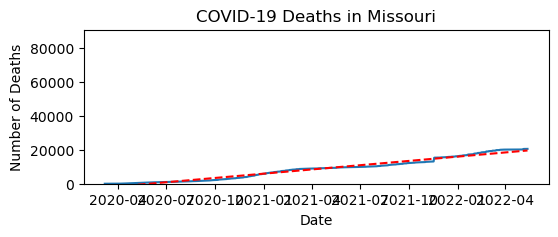

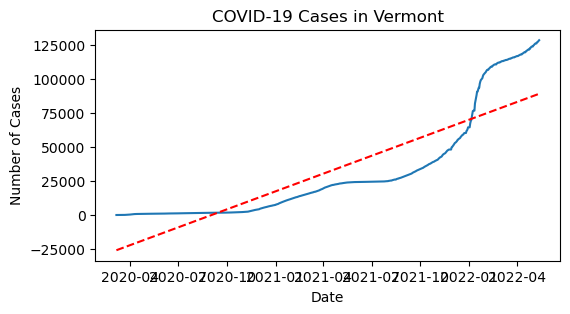

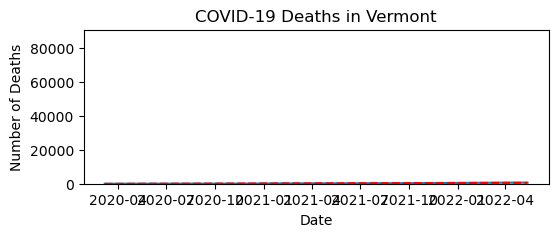

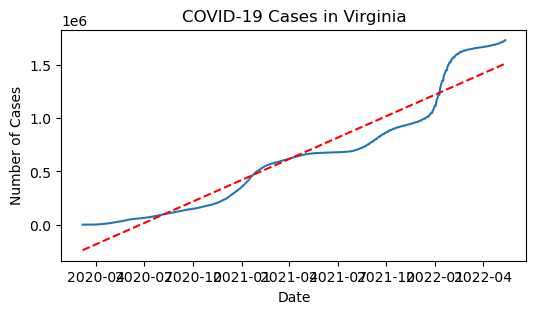

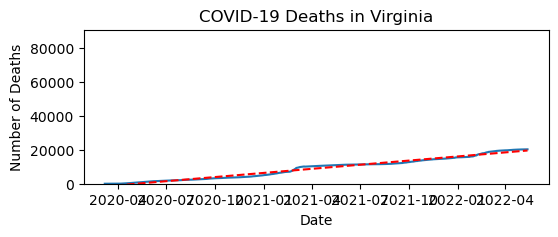

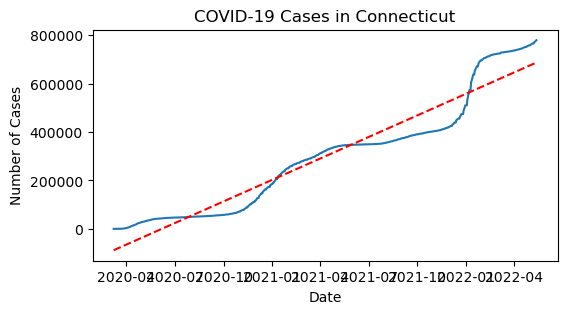

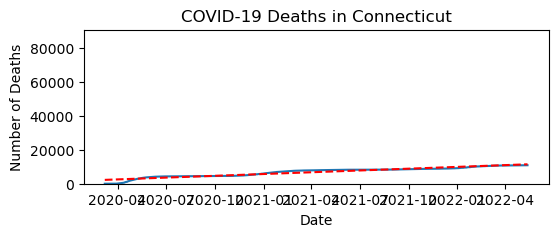

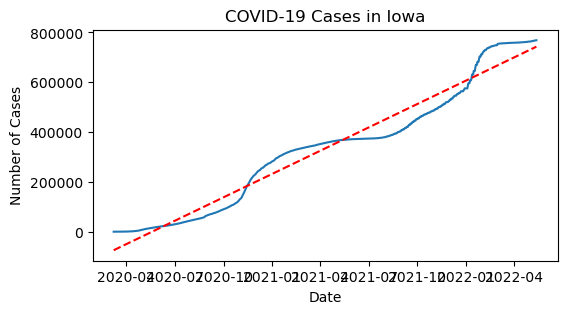

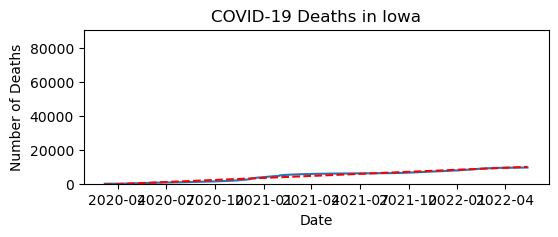

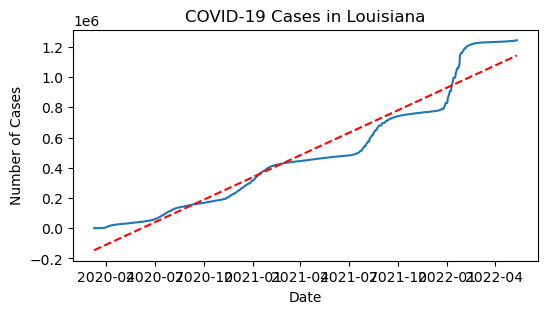

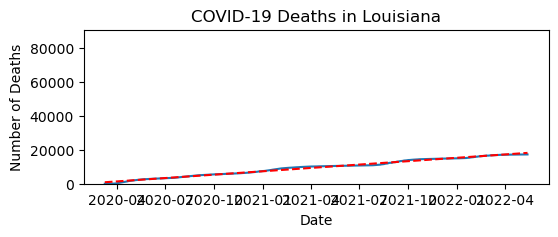

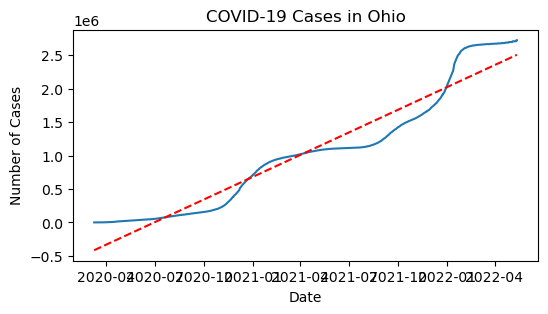

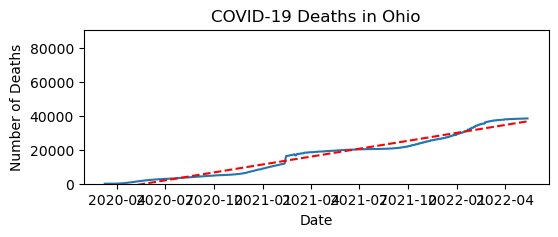

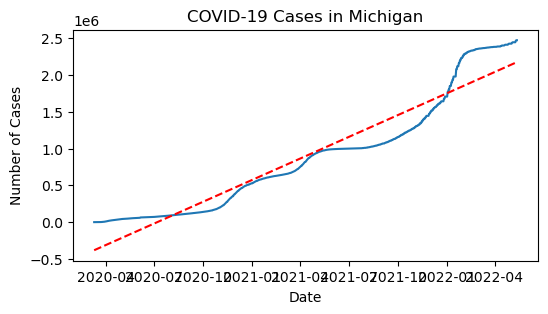

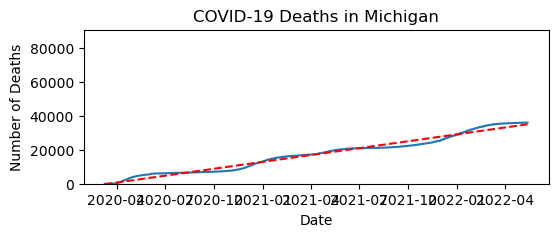

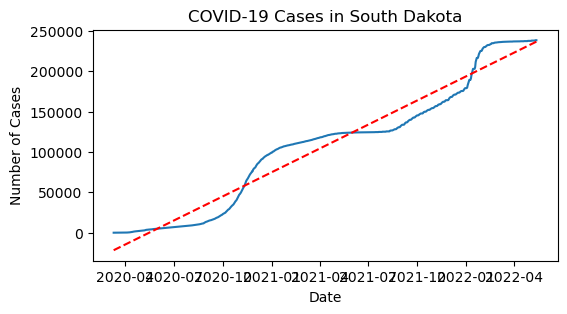

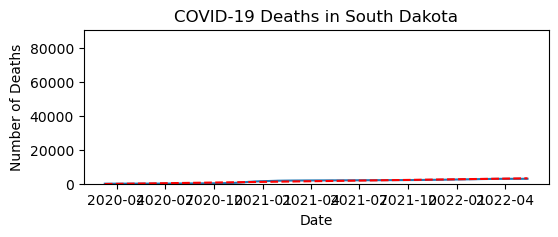

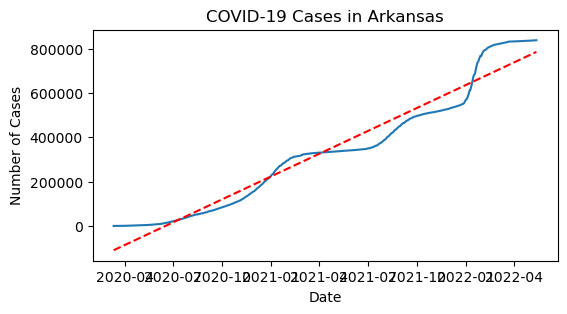

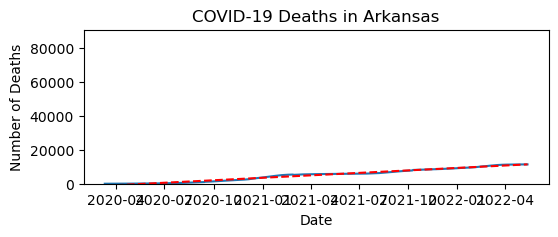

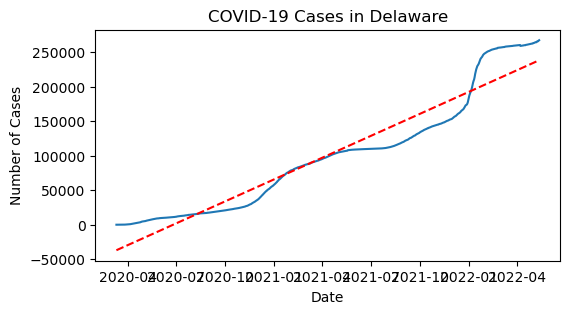

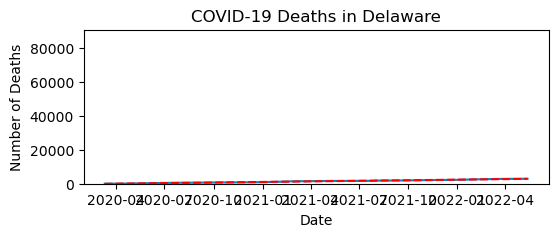

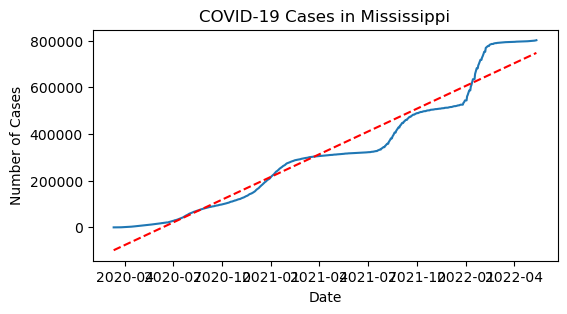

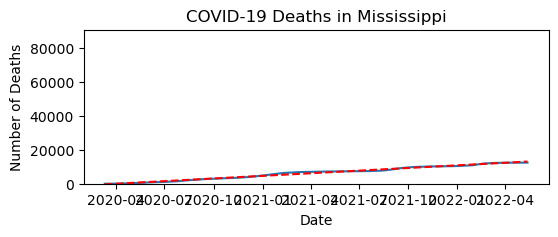

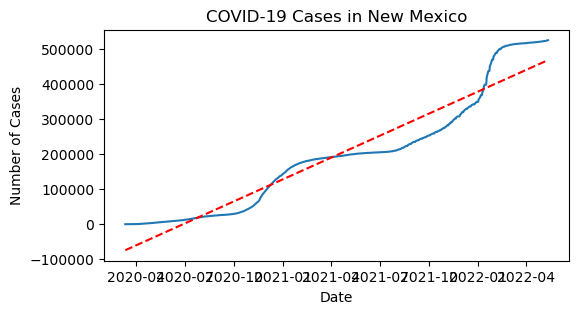

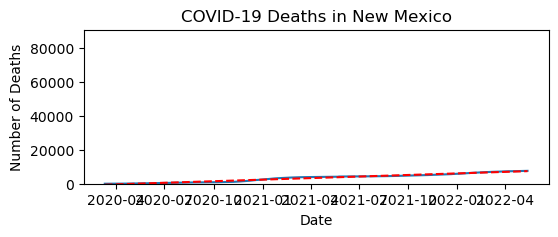

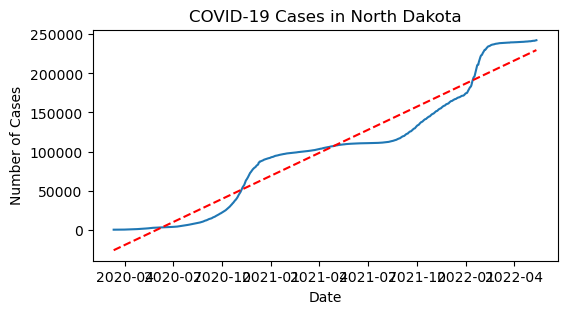

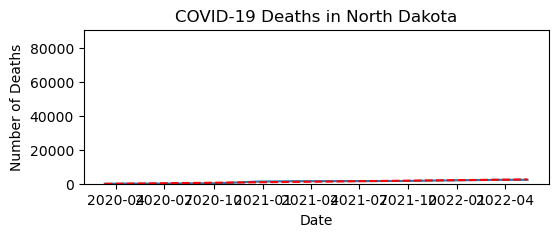

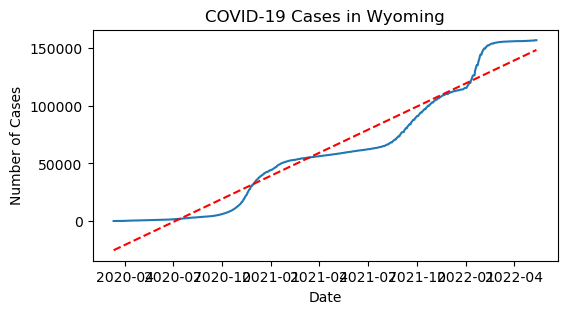

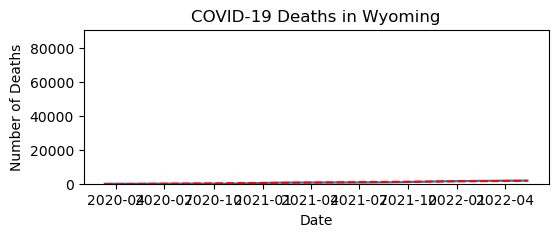

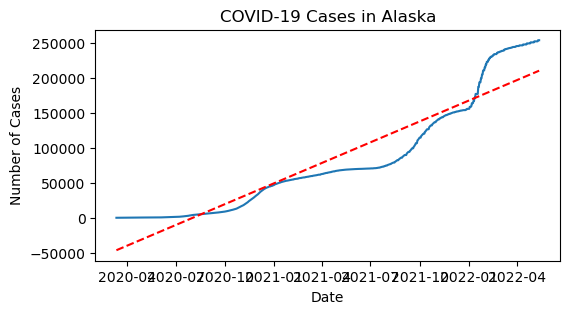

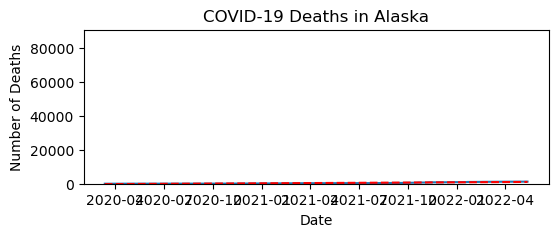

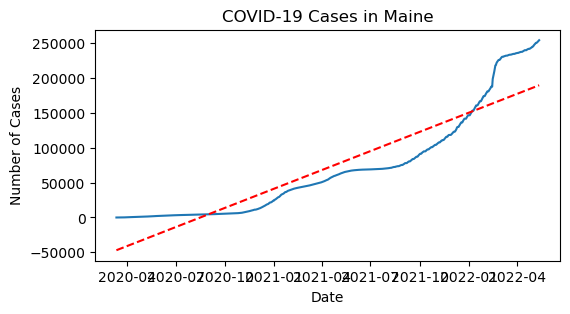

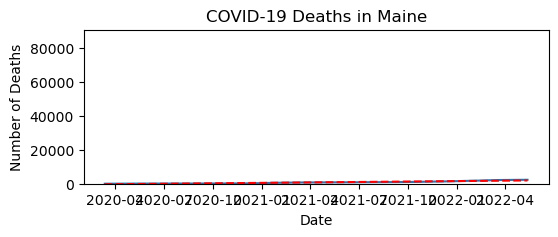

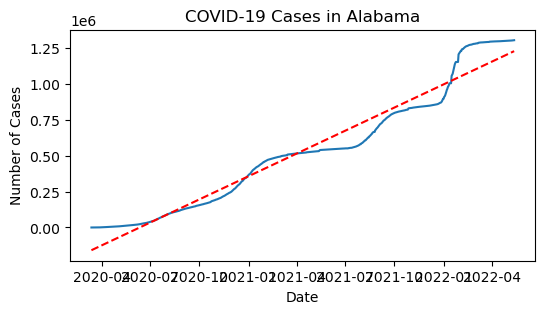

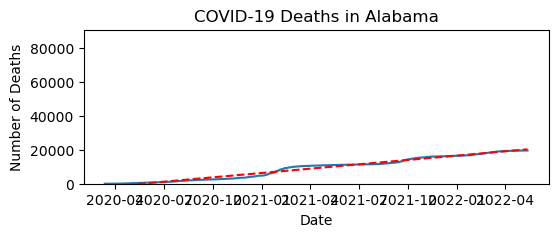

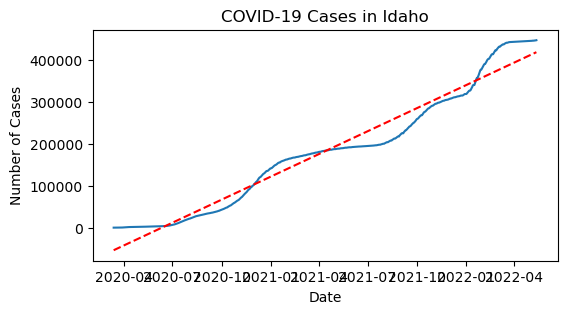

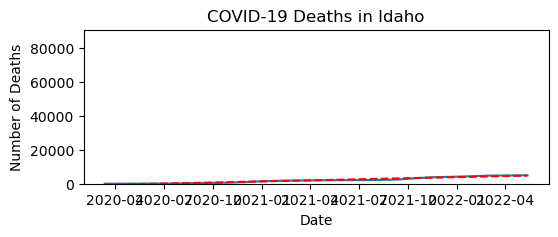

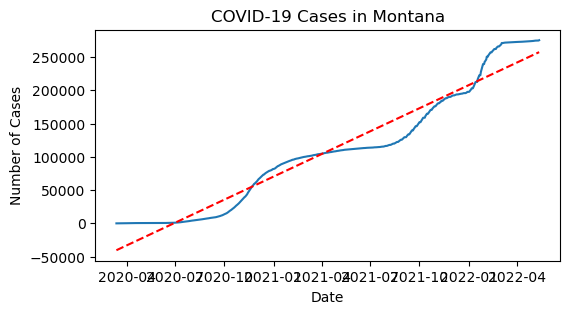

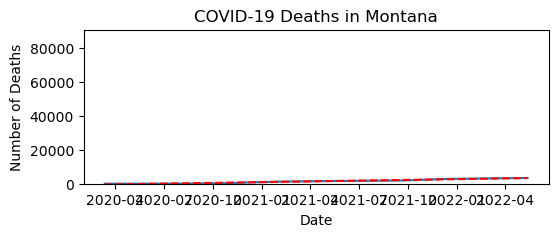

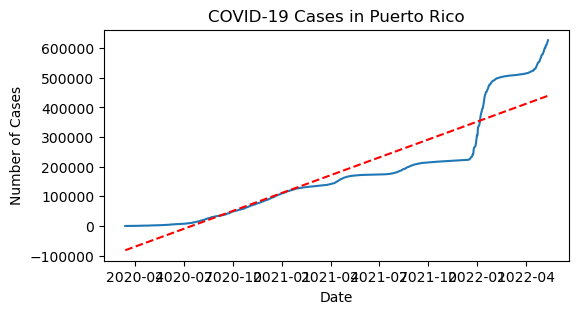

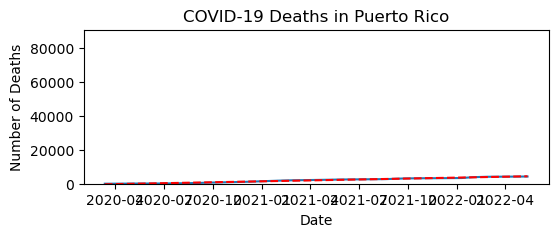

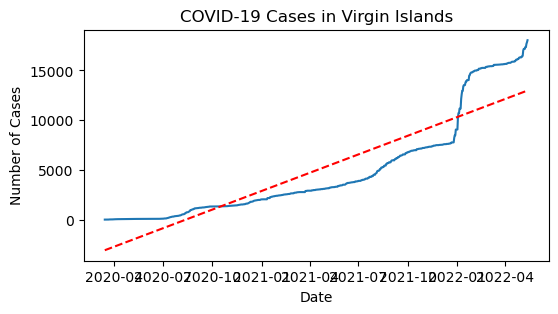

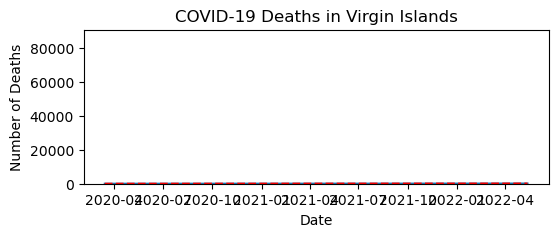

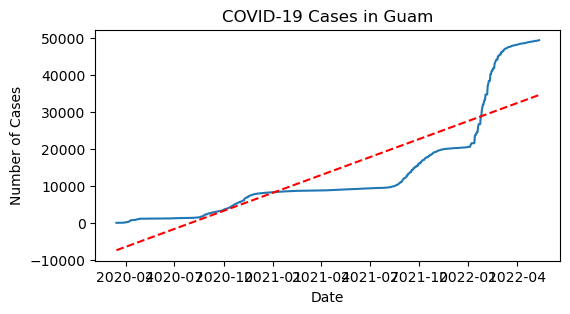

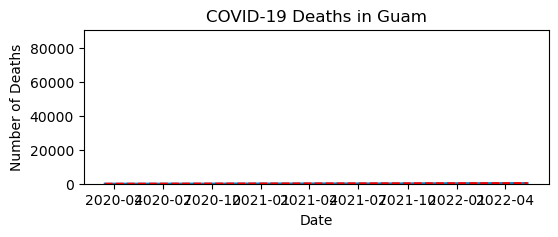

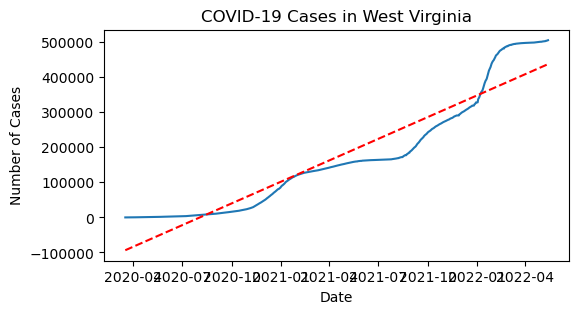

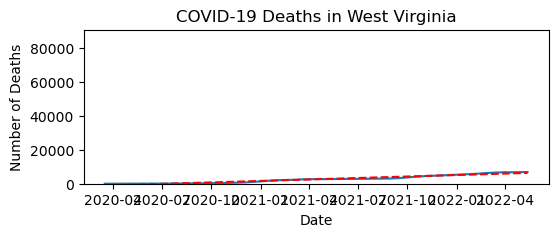

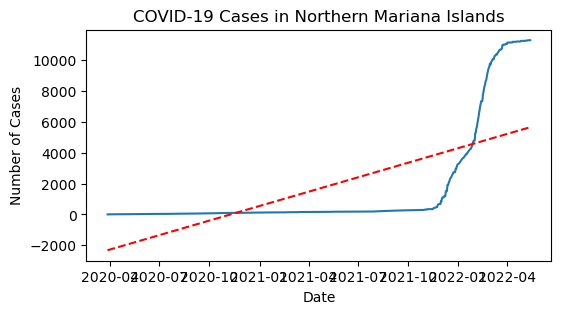

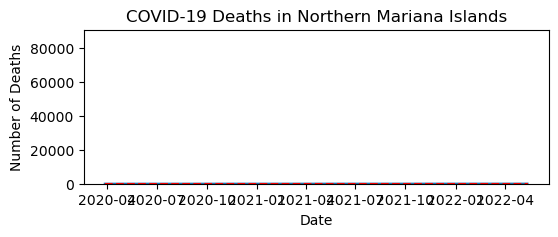

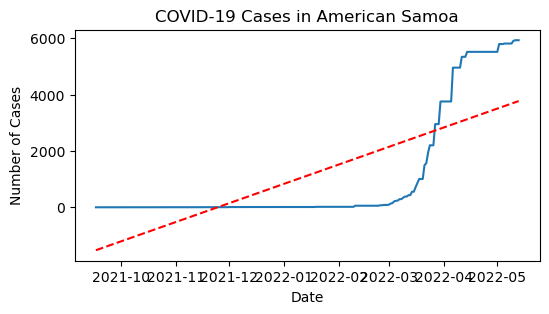

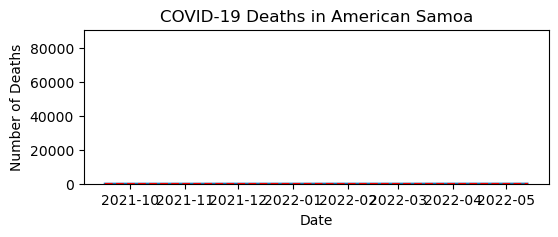

In [19]:
# Группировка данных по штатам и датам, agg по количеству случаев и смертей
state_cases_deaths = df.groupby(['state', 'date'])[['cases', 'deaths']].sum().reset_index()

# Уникальные названия
states = df['state'].unique()
# максимальное значение смертей по оси Y для всех графиков
y_max = state_cases_deaths['deaths'].max()


# будут графики для каждого из списка states 
for state in states:
    # Вытащу данные для текущего штата
    state_data = state_cases_deaths[state_cases_deaths['state'] == state]
    
    # Построение графика временных рядов с линией тренда для количества случаев
    plt.figure(figsize=(6,3))
    plt.plot(state_data['date'], state_data['cases'])
    plt.title(f'COVID-19 Cases in {state}')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    
    # Добавление линии тренда
    z = np.polyfit(range(len(state_data)), state_data['cases'], 1)
    p = np.poly1d(z)
    plt.plot(state_data['date'], p(range(len(state_data))), "r--")
    
    plt.show()
    
    # Аналогичное построение графика временных рядов с линией тренда для количества смертей
    plt.figure(figsize=(6,2))
    plt.plot(state_data['date'], state_data['deaths'])
    plt.title(f'COVID-19 Deaths in {state}')
    plt.xlabel('Date')
    plt.ylabel('Number of Deaths')
    # Задание единого максимума по оси Y
    plt.ylim(0, y_max)
    
    # Добавление линии тренда
    z = np.polyfit(range(len(state_data)), state_data['deaths'], 1)
    p = np.poly1d(z)
    plt.plot(state_data['date'], p(range(len(state_data))), "r--")
    
    plt.show()
    

## Прогноз значений до конца года

In [27]:
df = pd.read_csv('data/us-counties.csv')

In [28]:
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# NaN не помешают
df = df.fillna(0)
# Преобразование поля 'date' в числовой формат
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.strftime('%Y-%m-%d'))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').toordinal())

# Разделение данных на обучающую и тестовую выборки
train_df = df[df['date'] <= datetime(2021, 12, 31).toordinal()]
test_df = df[df['date'] > datetime(2021, 12, 31).toordinal()]

# Определение факторов и целевых переменных для модели
X_train = train_df[['date']]
y_train_cases = train_df['cases']
y_train_deaths = train_df['deaths']
X_test = test_df[['date']]

# Обучение модели линейной регрессии для 'cases'
reg_cases = LinearRegression().fit(X_train, y_train_cases)

# Предсказание значений 'cases' на тестовой выборке
y_pred_cases = reg_cases.predict(X_test)

# Обучение модели линейной регрессии для 'deaths'
reg_deaths = LinearRegression().fit(X_train, y_train_deaths)

# Предсказание значений 'deaths' на тестовой выборке
y_pred_deaths = reg_deaths.predict(X_test)


In [29]:
y_pred_deaths

array([257.36082776, 257.36082776, 257.36082776, ..., 309.66072896,
       309.66072896, 309.66072896])

In [30]:
df['date']

0          737445
1          737446
2          737447
3          737448
4          737448
            ...  
2502827    738288
2502828    738288
2502829    738288
2502830    738288
2502831    738288
Name: date, Length: 2502832, dtype: int64

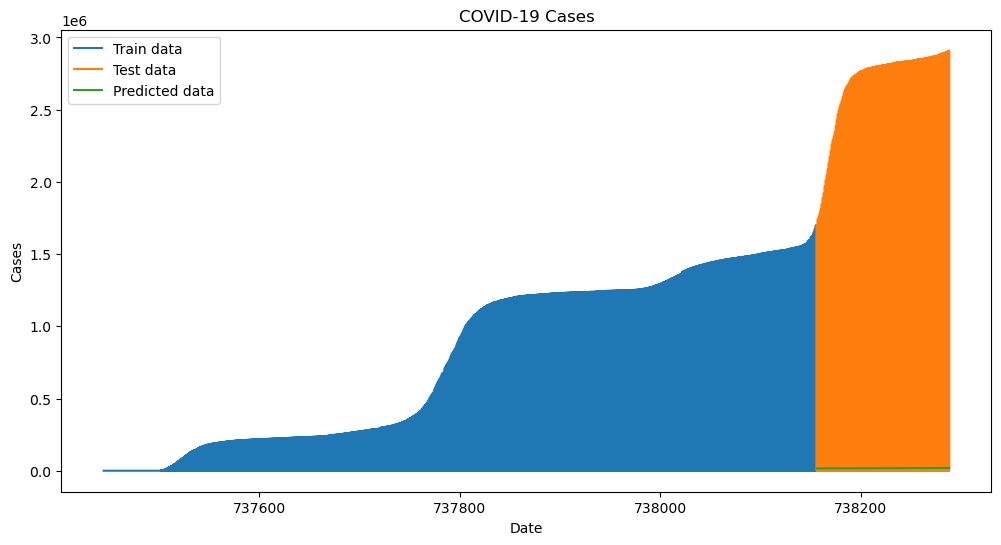

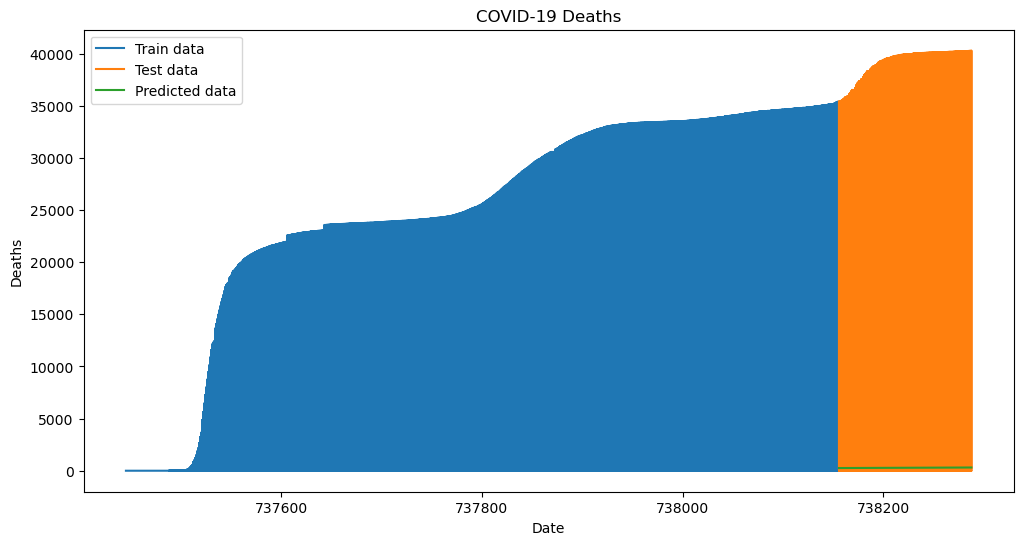

In [31]:
import matplotlib.pyplot as plt

# Построение графика для cases
plt.figure(figsize=(12, 6))
plt.plot(train_df['date'], train_df['cases'], label='Train data')
plt.plot(test_df['date'], test_df['cases'], label='Test data')
plt.plot(test_df['date'], y_pred_cases, label='Predicted data')
plt.title('COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

# Построение графика для 'deaths'
plt.figure(figsize=(12, 6))
plt.plot(train_df['date'], train_df['deaths'], label='Train data')
plt.plot(test_df['date'], test_df['deaths'], label='Test data')
plt.plot(test_df['date'], y_pred_deaths, label='Predicted data')
plt.title('COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()


  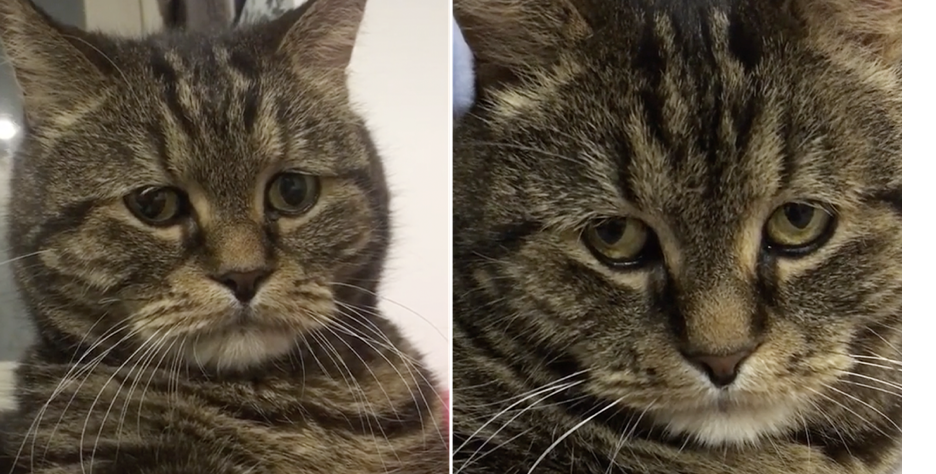